# CS-EJ3211 Machine Learning with Python 

## Round 3 - Model Validation and Selection

**submission deadline 15.02.2021 23:59 Helsinki time**

## Introduction 

When applying machine learning to prediction problems, our main objective is to find a model that can accurately predict the label of data points for which it is yet unknown. To this end, we want to estimate a model's predictive capability on data points that have not been used for training the model. This is also frequently referred to as the **generalization capability**

In the previous rounds, we established that ML models learn by searching for the predictor in the hypothesis space that minimizes the average loss on a set of **training data**. Also, we considered how to calculate the **training error** of a ML model, i.e., the error of the model on the training data. 

Unfortunately, the training error is a poor proxy for what we wish to measure - the predictive performance on new and unlabeled data. Based on this observation, we are faced with two questions:

1. How can we better estimate the performance of a trained model on new and unlabeled data? Such estimates are needed to assess whether a ML model is suitable for practical use and to select the best model for deployment out of many alternatives.


2. Is it possible to alter a ML model to learn a predictor function with good generalization capabilities? This is in contrast to learning the function that minimizes the average loss/training error.

In this round, you will find answers to both of these questions. We will first consider different **model validation** techniques for reliably estimating model performance on new data. Later, we will look at **regularization** techniques that enable ML models to learn predictor functions with better generalization capabilities by minimizing a penalized average loss during training.

## Learning goals


In this round, you will

* learn that the training error is a poor quality measure for a ML model 
* learn that the validation error is a more useful quality measure for a ML model 
* learn how to choose between different models using the validation error
* learn about regularization as a soft variant of model selection. 

## Background Material 

* [Video lecture](https://www.youtube.com/watch?v=MyBSkmUeIEs) of Prof. Andrew Ng on model validation and selection
* [Short video](https://www.youtube.com/watch?v=TIgfjmp-4BA) on K-Fold Cross validation from Udacity
* [Video lecture](https://www.youtube.com/watch?v=KvtGD37Rm5I) of Prof. Andrew Ng on regularization
* Chapter 2; Chapter 6; Chapter 7 of this [tutorial](https://arxiv.org/abs/1805.05052)  


## What is model validation?

Model validation is the process of evaluating the predictive capability of a ML model on new data points. By using good model validation techniques, we can estimate the performance of a ML model with reasonable confidence prior to its use in practice. Before we dive into the details of model validation, we will briefly consider **overfitting** in order to show why model validation is necessary.

Suppose that we want to predict a label $y$ of data points based on their features $\mathbf{x}$. In order to do this, we choose a ML model and train it on a set of labelled data by minimizing the average loss of its predictions. A naive approach we might then take to estimate the performance of the trained model is to calculate its training error, which we assume to be equivalent to the average loss. Unfortunately, this approach is highly problematic and leads to overly optimistic estimates of the model's predictive capabilities.

The training error is a poor estimate of a model's predictive performance because it is calculated on the same dataset that was used to train the model. Since this dataset only represents a small sample of all available data points, it is likely that a predictor that minimizes the average loss on the training set happens to fit this dataset particularly well. Consequently, the average loss on the training set will, in general, overestimate the performance of the model. This phenomenon is referred to as **overfitting**, because the trained model fits the training set overly well.

While some degree of overfitting is typically present when applying a ML model to a prediction problem, it is a particularly significant issue when applying ML models with large hypothesis spaces that contain complex predictor functions (in relation to the size of the dataset). In such cases, a model that seemingly fits the data very well might turn out to perform very poorly on data points not in the training set. This kind of situation is exemplified in the figure below.

<img src="../../../coursedata/R3_ModelValSel/overfitting.png" alt="Drawing" style="width: 600px;"/>

The figure visualizes a dataset containing $m=20$ data points, along with two different predictor functions that were obtained by training two ML models on the four data points indicated by the orange crosses. The green predictor belongs to a standard linear regression model, while the red predictor belongs to a more complex, 4th degree polynomial model. The key observation regarding the predictors is that while the more complex model fits the data used for training very well, it has a much poorer fit on the rest of the data than the simpler linear regression model.

While the figure above seems like an extreme example due to miniscule number of data points in the training set, it nonetheless makes an important point. If we do not have the capacity to validate a model's performance on data points outside the training set, we will likely  overestimate the predictive capability of complex models due to overfitting. This sets us up for a great let-down when applying the models in practice. Furthermore, we will end up selecting overly complex models over simpler ones when choosing between many candidate models. 

As a final note, it is worth emphasizing that the optimal complexity of the predictor function is generally dependent on the dataset's size. A deep neural network might generalize well when trained on a huge dataset, whereas even a linear model using many features might be prone to severe overfitting on a small dataset.

### Basic Model Validation

The simplest scheme for validating the predictive performance of a ML model is to train the model on only some of the available labelled data, and use the rest to validate the performance of the trained model. Typically, the dataset used for training is referred to as the **training set**, and the data used for validation is referred to as the **validation set**. The image below visualizes a dataset split into a training and validation set.

<img src="../../../coursedata/R3_ModelValSel/SplitValTrain.jpg" alt="Drawing" style="width: 600px;"/>

Let us repeat the scheme above in slightly more detail. Assume that we have a dataset $\mathbb{X}$ at our disposal, and that we wish to train a ML model that can predict the label $y$ of data points based on their features $\mathbf{x}$. To be able to later validate the performance of the model, we will first split the dataset $\mathbb{X}$ into a training set denoted by $\mathbb{X}^{(t)}$ and a validation set denoted by $\mathbb{X}^{(v)}$. The recommended size of the validation set is somewhat context dependent, but a common choice is 20-30% of the entire dataset.

After splitting the dataset, we train our model on the training set by minimizing the average loss. Finally, we calculate the average prediction error on the validation set in order to estimate the performance of our model on new data points. The average prediction error on the validation set is referred to as the **validation error**. 

Next, we will apply this validation scheme to the fictional prediction problem from the previous round, in which we sought to find the best model of a selection of models using a different number of features.

## The Problem 

We revisit the fictional scenario considered in round 2, in which you are an intern at a real estate fund in Helsinki and have been assigned a task of developing a ML model for predicting the median apartment price of different neighborhoods in Helsinki. The following excerpt serves to refresh your memory on the problem formulation:

"*The staff in your group have built a dataset containing features of 20 different neighborhoods. These features include the average number of rooms in the apartments, the percentage of buildings constructed before 1970 in the neighborhood, as well as eight experimental features designed by your colleagues in research. In addition, the fund's domain experts have valued a representative sample of apartments in each of the 20 neighborhoods and have arrived at a reliable estimate for the median apartment price in each one. This valuation has cost the fund a fortune, but the investment will pay off if your ML model can use this information to accurately predict the median apartment value of other neighborhoods at a negligible cost.*

*Let us model the problem of predicting the median home values as a machine learning problem. The data points in this problem are the different neighborhoods, and the label of these is the median apartment price. The features of the neighborhoods were already explicitly referred to in the previous paragraph. Still, it might be worth repeating that the features are properties belonging specifically to the data points.*"


<a id='handsondata'></a>
<div class=" alert alert-info">

### Demo. Load the data.
    
In the code snippet below, we create a function for loading the feature matrix `X` and label vector `y` for the apartment value problem. The function returns the feature matrix `X` of shape `(m,n)` and the label vector `y` of shape `(m,)`.
    
In most cases, it is not necessary to create a separate function for loading the data if the procedure is this simple. However, it is convenient in this case as we will reload the data before many tasks to make sure that the dataset has not been modified. In case you would have modified the dataset by mistake, you could receive wrong answers on student tasks despite your solutions being correct.
    
At the end of the cell, we use the newly defined function to load the data and print the shape of the feature matrix and label vector.

</div>

In [1]:
# Import basic libraries needed in this round
import numpy as np 
import pandas as pd  
from matplotlib import pyplot as plt

def load_housing_data(n=10):
    df = pd.read_csv("helsinki_apartment_prices.csv", index_col=0)  # Load dataframe from csv
    
    # Extract feature matrix and label vector from dataframe
    X = df.iloc[:,:n].to_numpy()
    y = df.iloc[:,-1].to_numpy().reshape(-1)
    
    return X, y
    
# Load the housing data
X, y = load_housing_data()

## Linear Predictors 

Recall that we previously calculated the training errors for a selection of linear regression models that use a different number of features for prediction. We will consider the same models in this round, but we will use more sophisticated methods to validate the performance of each model, and to select the one that outputs the best predictions on new data points. Altogether, we have 10 candidate models, each using the first $r$ features $x_1, x_2, \ldots, x_r$ in the original dataset, with $r$ ranging from 1 to 10, to predict the label $y$ of data points. 

The hypothesis space for a linear regression model using the first $r$ features consists of predictor functions of the form

\begin{equation*}
h^{(\mathbf{w})}(\mathbf{x}) = w_0 + \mathbf{w}^{T} \mathbf{x} = w_0 + \sum_{i=1}^r w_i x_i,
\end{equation*}

where the feature coefficients $\mathbf{w}=\big(w_1, w_2, \ldots, w_r \big)^T$ and the intercept term $w_0$ are the model parameters. Thus, the search for the best model amounts to the search for the best $r$.

We will start out by repeating the experiment of calculating the training errors for the different candidate models. 

<a id='trainModel'></a>
<div class=" alert alert-info">

### Demo. Varying Number of Features
    
The following code snippet computes the training error $E_{\rm train}(r)$ for each choice of $r$. For each particular value $r=1,\ldots,n$, the best linear predictor $h(\mathbf{x})$ is found using the  function `.fit()` of the `LinearRegression` class in scikit-learn.

[Documentation of the LinearRegression class in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 

</div>    

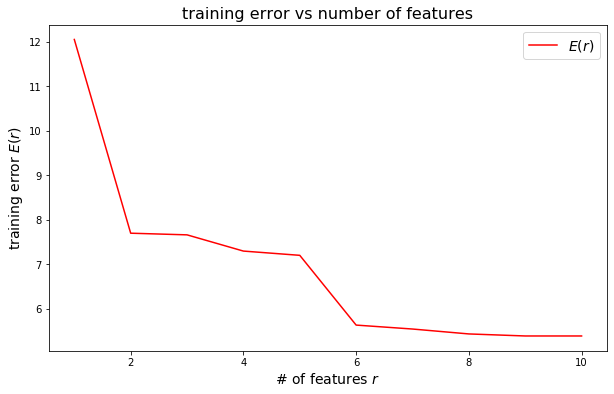

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

n = 10                        # maximum number of features used 

X,y = load_housing_data(n=n)  # read in 20 data points using n features 
linreg_error = np.zeros(n)    # vector for storing the training errors

for i in range(n): 
    reg = LinearRegression(fit_intercept=True)    # create an object for linear predictors
    reg = reg.fit(X[:,:(i+1)], y)    # find best linear predictor (minimize training error)
    pred = reg.predict(X[:,:(i+1)])    # compute predictions of best predictors 
    linreg_error[i] = mean_squared_error(y, pred)    # compute training error 

plot_x = np.linspace(1, n, n, endpoint=True)    # plot_x contains grid points for x-axis (1,...,n)

# Plot training error E(r) as a function of feature number r
plt.rc('legend', fontsize=14)    # Set font size for legends
plt.rc('axes', labelsize=14)     # Set font size for axis labels
plt.figure(figsize=(10,6))       # Set figure size
plt.plot(plot_x, linreg_error, label='$E(r)$', color='red')
plt.xlabel('# of features $r$')
plt.ylabel('training error $E(r)$')
plt.title('training error vs number of features', fontsize=16)
plt.legend()
plt.show()

### Let's Interpret the Results!

In the previous round, we were tempted to conclude that the model using all of the features is the best one based on the graph above. However, you might already have come to doubt this conclusion based on the issues considered earlier. 

As we have already discussed, it is not a good idea to use the training error to assess the performance of the optimal predictor since this predictor was found by minimizing the average loss on the training set.

Furthermore, the more features (larger $r$) we use, the better we will be able to fit the training data $\mathbb{X}^{(t)}$. However, this does not necessarily lead to better performance on new data. A complex model with too many features (large $r$) might only fit the training data very well, and generalize poorly to new data.

Consider the case of $r=m_{\rm train}$, i.e., the number of features is the same as the number of labeled data points in the training set. Under very mild conditions it can be shown that in this case there always exists a linear predictor $h(\mathbf{x})=\mathbf{w}^{T} \mathbf{x}$ such that $y^{(i)} = h(\mathbf{x}^{(i)})$, i.e., the training error is exactly zero (see Chapter 7.1 of this [tutorial](https://arxiv.org/abs/1805.05052)  )! 
A better way to evaluate the quality of a predictor is presented next.

##  Using the Validation Error

In this setting, the training error is a bad measure for the performance of the models since it will always favor the ones using more features (larger $r$). A better way to estimate the performance is to use the validation error

\begin{equation}
E_{\rm val}(r) = (1/m_{v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(r)}_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}, 
\end{equation} 

which is the MSE of the true and predicted labels of the data points in the validation set.

Since a lower validation error suggests better predictive capabilities on new data points, the best model is defined as the one resulting in the smallest validation error. Consequently, we should choose the model with the lowest validation error when selecting between multiple different models for solving an ML problem.

Next, we will explore how proper model validation changes our model choice in the example problem.

<a id='splitTestandValidationfunction'></a>
<div class=" alert alert-warning">

### Student Task. Generate Training and Validation Set.
   
Use the function `train_test_split()` in Scikit-learn's `model_selection` module to split the apartment data into a training and validation set. 

The function takes as input the original feature matrix `X` and label vector `y` and outputs the feature matrices and label vectors of the training- and validation sets in the order `X_train, X_val, y_train, y_val`. Moreover, the function takes additional input parameters that specify how the data should be split. In this case, you should set the parameters `test_size=0.2` and `random_state=2`. The parameter `test_size` indicates the proportion of the dataset that is used as the validation(/test) set.
    
For more information on the function, we refer to its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
</div>

In [3]:
from sklearn.model_selection import train_test_split    # Import train_test_split function

# Load the data
X, y = load_housing_data(n=10) 

### STUDENT TASK ###
# Compute the training and validation sets
# X_train, X_val, y_train, y_val = ...
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2)
# YOUR CODE HERE
#raise NotImplementedError()

In [4]:
# Check dimensions of train and validation vectors
assert len(X_train) == 16, "The 'X_train' vector has the wrong length"
assert len(y_train) == 16, "The 'y_train' vector has the wrong length"
assert len(X_val) == 4,   "The 'X_val' vector has the wrong length"
assert len(y_val) == 4, "The 'y_val' vector has the wrong length"
print('Sanity checks passed!')

Sanity checks passed!


<a id='trainValErrorsfunction'></a>
<div class=" alert alert-warning">

### Student Task. Compute Training and Validation Error. 
    
Complete the function `get_train_val_errors(X_train, X_val, y_train, y_val, n_features)` that returns the training and validation errors of linear predictors for each choice of $r=1,\ldots,n$. Please use `fit_intercept=True`. The training errors should be stored in a numpy array `err_train` of shape $(n,)$ and the validation errors should be stored in the numpy array `err_val` of shape $(n,)$. The first entries of `err_train` and `err_val` should be $E_{\rm train}(1)$ and $E_{\rm val}(1)$. 

</div>

In [5]:
def get_train_val_errors(X_train, X_val, y_train, y_val, n_features):  
    err_train = np.zeros(n)    # Array for storing training errors
    err_val = np.zeros(n)    # Array for storing validation errors
    
    for i in range(n_features):    # Loop over the number of features r 
        ### STUDENT TASK ###
        # YOUR CODE HERE
        reg = LinearRegression(fit_intercept=True)    # create an object for linear predictors
        reg = reg.fit(X_train[:,:(i+1)], y_train)     # find best linear predictor (minimize training error)
        y_pred_train = reg.predict(X_train[:,:(i+1)])  # compute predictions of best predictors 
        
        err_train[i] = mean_squared_error(y_train,y_pred_train)

        
        #reg = LinearRegression(fit_intercept=True)    # create an object for linear predictors
        #reg_val = reg.fit(X_val[:,:(i+1)], y_val)     # find best linear predictor (minimize training error)
        y_pred_val = reg.predict(X_val[:,:(i+1)])      # compute predictions of best predictors 
        
        
        err_val[i] = mean_squared_error(y_val, y_pred_val)    # compute training error 

        
        
        #raise NotImplementedError()
    return err_train, err_val


In [6]:
# max number of features
n = 10
# Calculate training and validation errors using ´get_train_val_errors´
err_train, err_val = get_train_val_errors(X_train, X_val, y_train, y_val, n)

# Perform some sanity checks on the results
assert err_train.shape == (n,), "numpy array err_train has wrong shape"
assert err_val.shape == (n,), "numpy array err_val has wrong shape"
print('Sanity checks passed!')


Sanity checks passed!


Next, we plot the training and validation errors from the previous task:

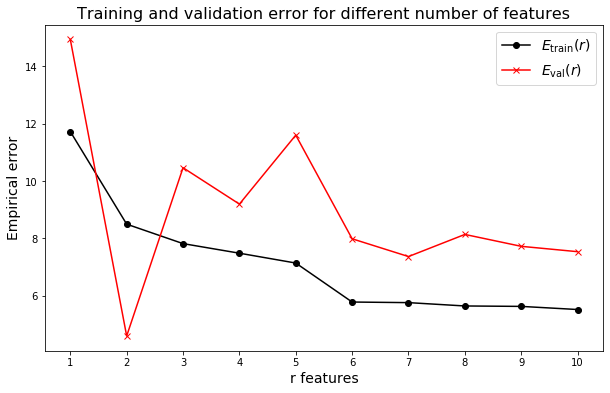

In [7]:
# Plot the training and validation errors for the different number of features r
plt.figure(figsize=(10,6))
plt.plot(range(1, n + 1), err_train, color='black', label=r'$E_{\rm train}(r)$', marker='o')  # Plot training error
plt.plot(range(1, n + 1), err_val, color='red', label=r'$E_{\rm val}(r)$', marker='x')  # Plot validation error

plt.title('Training and validation error for different number of features', fontsize=16)    # Set title
plt.ylabel('Empirical error')    # Set label for y-axis
plt.xlabel('r features')    # Set label for x-axis
plt.xticks(range(1, n + 1))  # Set the tick labels on the x-axis to be 1,...,n
plt.legend()
plt.show()

If you have completed the task correctly, you should see plot similar to this one:

<img src="../../../coursedata/R3_ModelValSel/train_val_error.png" alt="Drawing" style="width: 600px;"/>

In the figure, we can see that the validation error behaves very differently in comparison to the training error. The validation error obtains its minimum value at $r=2$ whereas the training error is monotonously decreasing with respect to $r$. It is clear that the training error is misleading as a measure of a model's performance on new data points.

While the validation error in the figure above exposes the uselessness of the training error, the simple validation scheme we used is not perfect either. If the dataset used for training and validation is not very large, the amount of data points in the validation set might be insufficient for reliably describing the distribution of data points in general. Consequently, the average error on the validation set might not accurately reflect the performance of the model on new data points.

For example, the validation error for $r=2$ is much lower than the training error in the figure above. Since ML models have a tendency to overfit the training set, the error on the validation set should not be lower than the training error if both sets accurately represent the distribution of the data. Therefore, we have a strong reason to believe that the validation set used in the task above just happens to fit the trained predictor for $r=2$ very well.

Fortunately, the reliability of the validation error can be easily improved by averaging multiple validation errors calculated using different training and validation sets. This approach is called $K$-fold cross-validation, and is presented next in more detail. 

## K-fold Cross-Validation

When the amount of data available for training and validation is limited, there is a trade-off between overfitting the training set and the reliability of the validation error. On one hand, a smaller training set makes the models more prone to overfitting, but on the other, a smaller validation set leads to a less reliable estimate of the model's generalization capability.

This problem can largely be avoided by using a more sophisticated validation method called **$K$-fold cross-validation**. In $K$-fold cross-validation, the data is first split into $K$ approximately equally sized subsets. Then, the subsets are used to calculate $K$ different estimates of the validation error, so that the $i$:th estimate is calculated using the $i$:th subset as the validation set and the remaining $K-1$ subsets as the training set. Finally, the $K$ estimates are averaged to obtain a final estimate of the validation error.

As an example, a diagram of  5-fold cross-validation is depicted below. For each round, the subset used as the validation set is indicated by "test". 

<img src="../../../coursedata/R3_ModelValSel/cross_validation_diagram.png" alt="Drawing" style="width: 400px;"/>

<a id='kfold'></a>
<div class=" alert alert-info">
    
### Demo. Creating K data splits in sklearn.
    
The code snippet below shows how to use a `KFold` object in scikit-learn to iterate through `K` train/validation splits of the dataset `X`.
    
On initialization the `KFold` object is given the number of data splits `K` as an argument to the parameter `n_splits`. The Python [generator function](https://docs.python.org/3.8/glossary.html#term-generator) `KFold.split(X)` can then be used to iterate through the pairs of training and validation indices. 

For an array `idx` of indices, the data points in X corresponding to these indices can be obtained by `X[idx,:]`. We can use this to obtain the training and validation sets given the indices of the datapoints in the respective sets.

For more information, see the scikit-learn [documentation of KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).
</div>  

In [8]:
# Import KFold class from scikitlearn library
from sklearn.model_selection import KFold

K=5    # Specify the number of folds of split data into
kf = KFold(n_splits=K, shuffle=False)    # Create a KFold object with 'K' splits

# For all splits, print the validation and training indices
iteration = 0
for train_indices, test_indices in kf.split(X):
    iteration += 1
    X_train = X[train_indices,:]    # Get the training set    
    X_val = X[test_indices,:]    # Get the validation set
    print('Iteration {}:'.format(iteration))
    print('Indices for validation set:', test_indices)
    print('Indices for training set:', train_indices)
    print('X_val shape: {}, X_train shape: {} \n'.format(X_val.shape, X_train.shape))

Iteration 1:
Indices for validation set: [0 1 2 3]
Indices for training set: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 2:
Indices for validation set: [4 5 6 7]
Indices for training set: [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 3:
Indices for validation set: [ 8  9 10 11]
Indices for training set: [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 4:
Indices for validation set: [12 13 14 15]
Indices for training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19]
X_val shape: (4, 10), X_train shape: (16, 10) 

Iteration 5:
Indices for validation set: [16 17 18 19]
Indices for training set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
X_val shape: (4, 10), X_train shape: (16, 10) 



<a id='kfold'></a>
<div class=" alert alert-warning">

### Student task. 5-Fold Cross Validation.
     
The purpose of the code snippet below is to compute the training and validation errors for each choice of $r=1,\ldots,n$ using 5-fold cross-validation. Your task is to complete the part of the loop that performs 5-fold cross-validation using the `KFold` class in scikit-learn. For each $r$ you should
    
1. Iterate over the `K` pairs of train and test indices and for each pair, calculate the training and validation errors of a linear regression model (with `fit_intercept=True`) and store them in  `train_errors_per_cv_iteration` and `test_errors_per_cv_iteration` respectively.
    
    
2. Calculate the average training- and validation errors and store these at index `r` in the arrays `err_train` and `err_val` (both of shape $(n, )$) respectively.

For more information, see the scikit-learn [documentation of KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

Afterwards, the training- and validation errors are plotted for comparison with the errors from the previous student task.

</div>  

In [166]:
n = 10

X, y = load_housing_data(n=n)  # read in m data points with n features 

err_train = np.zeros(n)  # Array to store training errors
err_val = np.zeros(n)  # Array to store validation errors

K = 5
kf = KFold(n_splits=K, shuffle=False)    # Create a KFold object with 'K' splits

for r in range(n):
    train_errors_per_cv_iteration = []  # List for storing the training errors for the splits
    val_errors_per_cv_iteration = []  # List for storing the validation errors for the splits
    
    ### STUDENT TASK ###
    # YOUR CODE HERE
    
    for train_indices, test_indices in kf.split(X):
        # create an object for linear predictors
        reg = LinearRegression(fit_intercept=True)
        # Train the model with training set
        X_train = X[train_indices,:(r+1)]    # Get the training set    
        y_train = y[train_indices]
        
        reg = reg.fit(X_train, y_train) 
        y_pred_train = reg.predict(X_train) 
        
        train_errors_per_cv_iteration.append(mean_squared_error(y_train, y_pred_train)) 
        
        X_val = X[test_indices,:(r+1)]     # Get the testing set     
        y_val = y[test_indices]        
         
        y_pred_val = reg.predict(X_val)
        
        val_errors_per_cv_iteration.append(mean_squared_error(y_val, y_pred_val))
       
        #raise NotImplementedError()

        err_train[r] = sum(train_errors_per_cv_iteration)/K
        err_val[r] = sum(val_errors_per_cv_iteration)/K

print('Training errors for each K:')
print(err_train, '\n')
print('Validation error for each K:')
print(err_val, '\n')

Training errors for each K:
[11.57492612  7.32680575  7.06466515  6.62727341  6.32340037  4.84830428
  4.61272933  4.41421461  4.30814454  3.94448482] 

Validation error for each K:
[16.57347087 11.22746434 15.24470805 15.88814684 18.59989095 15.92795622
 19.19772325 20.67720822 22.79305908 29.46782961] 



In [167]:
# Perform sanity checks on the outputs
assert err_train.shape == (n,), "err_train is of the wrong shape!"
assert err_val.shape == (n,), "err_val is of the wrong shape!"
assert err_val[0] > err_val[1], "The second element of err_val should be larger than the first element!"

print("Sanity checks passed!")


Sanity checks passed!


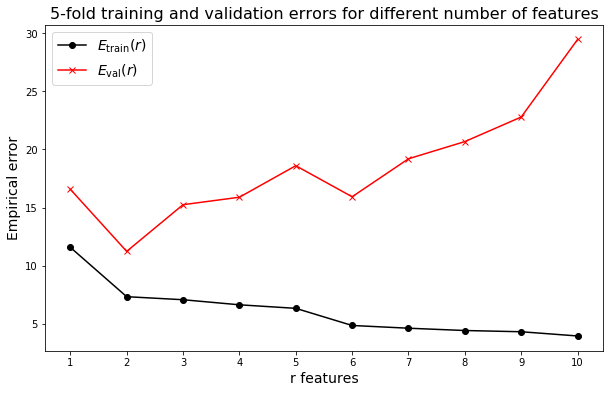

In [168]:
# Plot the training and validation errors for the different number of features r
plt.figure(figsize=(10,6))
plt.plot(range(1, n+1), err_train, color='black', label=r'$E_{\rm train}(r)$', marker='o')  # Plot training error
plt.plot(range(1, n+1), err_val, color='red', label=r'$E_{\rm val}(r)$', marker='x')  # Plot validation error

plt.title('5-fold training and validation errors for different number of features', fontsize=16)    # Set title
plt.ylabel('Empirical error')    # Set label for y-axis
plt.xlabel('r features')         # Set label for x-axis
plt.xticks(range(1, n+1))      # Set the tick labels on the x-axis to be 1,...,n
plt.legend()
plt.show()

If you have completed the task correctly, you should see plot similar to this one:

<img src="../../../coursedata/R3_ModelValSel/train_val_kfold.png" alt="Drawing" style="width: 600px;"/>

If we compare the figure above to the one in the previous student task, we can see that the validation error obtained by 5-fold cross-validation seems to provide a more realistic estimate of the model's performance on new data. The validation error is now consistently larger than the training error, and the validation error seems less erratic. In practice, it is almost always preferable to use K-fold cross-validation instead of a single validation split for model validation and selection due to the increased robustness of the validation error.

With regards to the apartment price problem, we can conclude with reasonable confidence that the model with the best performance on new data points is the one using only the number of rooms and the percentage of apartments in the neighbourhood constructed before 1970 as its features. As such, it would seem that the experimental features in the dataset were not beneficial after all.

This example problem highlights the importance of using proper model validation. Since ML models nearly always overfit to some degree, it is important to estimate the true performance of the model before practical use by using model validation. 

## Estimating the accuracy of the selected model on a separate test set

We can use validation error to select the model with the best performance on new data out of many candidate models. In most applications, we are also interested in obtaining an estimate of the performance of the selected model on new data. To this end, it would seem convenient to use the validation error from the model selection phase, but unfortunately this generally results in an overly optimistic estimate.

The validation error is, in general, an excessively optimistic estimate of the performance of the final model **since the model is chosen based on this value**. We can persuade ourselves of the validity of this statement by imagining two different models with a negligible difference in the expected error on new data points. **If we select one of these models based on the models' validation errors on a finite validation set, we will end up selecting the model that happens to fit the validation set better**.

The solution to this is to use a separate dataset, frequently referred to as the **test set**, for testing the performance of the final model. In practice, the test set is most often obtained by selecting a part of the original dataset for this purpose. The rest of the data points are then used to train and validate the different model candidates using the methods described in this notebook.

As a final note, it is good to emphasize that the separate test set is only necessary when we have selected a model based on the validation error. If we are only interested in obtaining the performance estimate for one model, a single validation/test set suffices.

##  Regularization

In the previous sections, we considered how to validate trained ML models to get high-quality estimates of their predictive capabilities. In the remainder of the notebook, we consider a tangential question - how to train an ML model so that the learned predictor generalizes better to new data than the predictor minimizing the average loss. 

Consider an ML method based on a large hypothesis space such as polynomials with a large degree. Large hypothesis spaces typically contain complex predictors that achieve very low training errors by overfitting the data. Thus, if we search for the optimal predictor in this hypothesis space (i.e., train the model) by minimizing the training error, we will obtain a predictor that overfits the training data and generalizes poorly to other data. However, there might be predictors in the hypothesis space that generalize much better to new data even though they have a higher average loss than the learned predictor.

**Regularization** is a technique in which models are trained using by minimizing a **cost function** that penalizes the complexity of a predictor function $h$. The cost function that is minimized when training a regularized model is composed of the average loss and an additional **penalty term**:


\begin{equation}
 \mathcal{E}(h) = \underbrace{\underbrace{(1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2}}_{\mbox{ average loss}} + \underbrace{\alpha \mathcal{R}(h)}_{\mbox{anticipated increase of error (loss) on new data}}}_{\mbox{ estimate (approximation) of validation error }}.  
\end{equation}

The central idea of regularization is that the penalized cost function is minimized by a less complex predictor than the average loss. Thus, a model trained using the penalized cost function should, in general, have better generalization capabilities provided that the penalty term is well chosen. 

The penalty term itself is composed of two factors - a **regularization term** $\mathcal{R}(h)$ and a scaling factor $\alpha$. The former quantifies a function's complexity, and the latter scales the penalty by a specified factor. Effectively, $\alpha$ **offers a trade-off between the prediction error (training error) incurred on the training data and the complexity of a predictor**. Large $\alpha$ favor less complex predictor functions, while small $\alpha$ put more emphasis on obtaining a small average loss.


### The regularization term (choosing $\mathcal{R}(h)$)

In order to implement regularization in practice, we need to choose a regularization term $\mathcal{R}$ that quantifies the complexity of predictor functions in an appropriate way. Two widely used choices are the $\ell_1$ norm 

\begin{equation}
\|\mathbf{w} \|_1 = \sum_{i=1}^n |w_i|= |w_1| + |w_2| + \ldots + |w_n|
\end{equation}

and the squared $\ell_2$ norm

\begin{equation}
\|\mathbf{w} \|_2^2 = \sum_{i=1}^n w_i^2 = w_1^2 + w_2^2 + \ldots + w_n^2.
\end{equation}

Both of these alternatives are based on the premise that the complexity of a predictor increases with the magnitude of its parameters $w$.

### Hyperparameter tuning (choosing $\alpha$)

The $\alpha$ factor in the regularized cost function is a **hyperparameter** of the regularized model. In contrast to **model parameters**, hyperparameters are not optimized by training the model but must be defined in advance. The hyperparameters' values are typically chosen by selecting the value from a set of candidates that results in the lowest validation error for the trained model. This process is called **hyperparameter tuning** and can be seen as a case of model selection, in which the models differ by the values of the hyperparameters.

The hyperparameter tuning process for $\alpha$ proceeds roughly as follows:
1. we specify a list of candidate values for $\alpha$, 
2. for each choice of $\alpha$, we learn a predictor that minimizes the regularized cost function
3. for each choice of $\alpha$, we validate the trained predictor $h^{(\alpha)}_{\rm opt}$ by computing the validation error

\begin{equation}
E_{\rm val}^{(\alpha)} = (1/m_{\rm v}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(v)}} \big(y^{(i)} - h^{(\alpha)}_{\rm opt}(\mathbf{x}^{(i)})\big)^{2}.
\end{equation}

4. We select the value of $\alpha$ with smallest validation error to be used in our final model 


<a id='ridgeReg'></a>
<div class=" alert alert-info">

### Demo. Ridge Regression. 

Ridge regression learns a linear predictor function

\begin{equation}
h^{(\mathbf{w})}(\mathbf{x}) =w_0 + \mathbf{w}^{T} \mathbf{x}
\end{equation}

by minimizing the regularized loss function with the regularization term
    
\begin{equation}
\mathcal{R}(h)=\|\mathbf{w}\|_{2}^{2}.
\end{equation}
    
A ridge regression model can be fitted to a dataset with scikit-learn by using the function `Ridge.fit()`. After fitting the model, the optimal weight vector $\mathbf{w}_{\rm opt}$ is stored in the attribute `Ridge.coef_` of the `Ridge` instance. 

[See documentation of Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

</div>  

In [170]:
from sklearn.linear_model import Ridge

n = 10
X, y = load_housing_data(n)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)  # 80% training and 20% test

alpha = 10    # Define value of the regularization parameter 'alpha'

ridge = Ridge(alpha=alpha, fit_intercept=True)    # Create Ridge regression model
ridge.fit(X_train, y_train)    # Fit the Ridge regression model on the training set
y_pred = ridge.predict(X_train)    # Predict the labels of the training set
w_opt = ridge.coef_    # Get the optimal weights (regression coefficients) of the fitted model
err_train = mean_squared_error(y_pred, y_train)    # Calculate the training error

# Print optimal weights and training error
print('Optimal weights: \n', w_opt)
print('Training error: \n', err_train)

Optimal weights: 
 [ 1.62648008 -0.13079883  0.8888383  -0.58619617 -0.98729306  0.28057208
 -0.09922109  0.93619655 -0.14894959  0.13927532]
Training error: 
 13.682054265430256


**The Lasso** is another regularized regression method, which regularizes the training error of linear predictors $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ with the complexity measure $\mathcal{R}(h)= \|\mathbf{w}\|_{1}$. 

<a id='lassoReg'></a>
<div class=" alert alert-warning">

### Student Task. Lasso Regression.

Complete the function `fit_lasso` that uses the Scikit-learn function `Lasso.fit()` to compute the optimal predictor for $\alpha=$ `alpha_val`. When initializing Lasso, please use `fit_intercept=True`. This function is then used find the optimal Lasso predictor for $\alpha = 1$.

[Documentation for Lasso in Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

</div>

In [178]:
from sklearn.linear_model import Lasso

X, y = load_housing_data(n)    # read in m data points using n features 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)    # 80% training and 20% test

def fit_lasso(X_train, y_train, alpha_val):
    ### STUDENT TASK ###
    # .
    # .
    # w_opt = ...
    # training_error = ...
    # YOUR CODE HERE
    
    reg = Lasso(alpha=alpha_val,fit_intercept=True)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_train)
    w_opt = reg.coef_ 
    training_error  = mean_squared_error(y_pred, y_train)
    
    #raise NotImplementedError()
    return w_opt, training_error

In [179]:
# Set alpha value
alpha_val = 1

# Fit Lasso and calculate optimal weights and training error using the function 'fit_lasso'
w_opt, training_error = fit_lasso(X_train, y_train, alpha_val)

# Print optimal weights and the corresponding training error
print('Optimal weights: \n', w_opt)
print('Training error: \n', training_error)

# Perform some sanity checks on the outputs
from sklearn.linear_model import Lasso
assert w_opt.reshape(-1,1).shape == (10,1), "'w_opt' has wrong shape"
assert np.isscalar(training_error), "'training_error' is not scalar"
assert training_error < 1000, "'training_error' is too large"
print('Sanity check tests passed!')


Optimal weights: 
 [ 3.56106346 -0.13171416  0.         -0.         -0.          0.
 -0.          0.02624124  0.          0.        ]
Training error: 
 14.731838524845278
Sanity check tests passed!


When using Lasso or ridge regression, we need to find a suitable value for the regularization parameter $\alpha$. We can do this by using the hyperparameter tuning scheme presented earlier. This type of hyperparameter tuning is often referred to as **grid search**.

<a id='lassoParameter'></a>
<div class=" alert alert-warning">

### Student Task. Tuning the Regularization Parameter in the Lasso.
    
In this task, your objective is to calculate the training and validation errors of a Lasso model with different values of $\alpha$ using grid-search. The training and validation errors are to be calculated using 5-fold cross-validation. To this end, you will use an extremely useful class in Scikit-learn: [GridSeachCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
    
`GridSearchCV` takes as input an estimator object (i.e., a Scikit-learn model such as `LinearRegression`) and a dictionary containing key-value pairs, where the key is the name of some parameter of the estimator and the value is a list of candidate values for that parameter. It also takes other optional parameters, such as the number of data splits `cv` in cross-validation.
    
The grid-search itself is performed by calling the function `GridSearchCV.fit(X,y)`. After calculating validation scores(~errors) for the different parameter values, the function fits the model with the best parameter value. The results of the parameter search, including validation errors, are saved in the attribute `.cv_results_`.
    
To solve this task using `GridSearchCV`, you must 
    
1. Create a [dictionary](https://realpython.com/python-dicts/) containing one key-value pair with the candidate values `alpha_values` for the parameter `alpha`
    
    
2. Create a `Lasso` object without defining the parameter `alpha`
    
    
3. Create a `GridSearchCV` object with the `Lasso` object and the dictionary as inputs. Furthermore, you must define the parameters `scoring='neg_mean_squared_error'`, `cv=5`, and `return_train_score=True`. Here, `scoring` defines the metric with which training and validation errors are calculated, `cv` the number of splits in the $K$-fold cross-validation, and `return_train_score` whether or not training errors are calculated.
    
    
4. Use the function `GridSearchCV.fit(X,y)` to calculate training and validation errors for different parameter values and subsequently fit the model with the best $\alpha$. The function takes as input the entire feature matrix `X` and label vector `y`. 
    
    
5. Save the training and validation errors in the variables `err_train` and `err_val`, respectively. The grid-search results are found in the attribute `cv_results_` of the `GridSearchCV` object. The results are stored in a dict, and the training and validation scores are accessed with the keys `mean_train_score` and `mean_test_score`. `GridSearchCV` uses negative MSE instead of MSE for implementational reasons, so you must remember to turn the errors positive when defining `err_train` and `err_val`.
    

**Hint:** You can check this [tutorial](https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10) for a quick example of how `GridSearchCV` is used.
</div>

In [212]:
from sklearn.model_selection import GridSearchCV

alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
### STUDENT TASK ###
# params = ...
# cv = ...
# lasso = ...
# cv = ...
# cv.fit(...)
# err_train = ...
# err_val = ...
# YOUR CODE HERE

parameters = {'alpha' : alpha_values}

lasso = Lasso(fit_intercept=True)

cv = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5, return_train_score=True)

cv.fit(X, y)

err_train = abs(cv.cv_results_['mean_train_score'])
err_val = abs(cv.cv_results_['mean_test_score'])


print(err_train)
print(err_val)


#raise NotImplementedError()

[ 3.94469386  3.96094409  4.50221055 12.30643344 27.65012783 34.24282813]
[29.08067886 26.56939019 17.94289825 28.3640849  50.53875208 48.43929687]


In [213]:
# Perform some sanity checks on the outputs
assert err_train[0] > 0 and err_val[0] > 0, "Errors are negative!"
assert len(err_train) == len(alpha_values), "'err_train' has wrong shape"
assert len(err_val) == len(alpha_values), "'err_val' has wrong shape"
print('Sanity check tests passed!')


Sanity check tests passed!


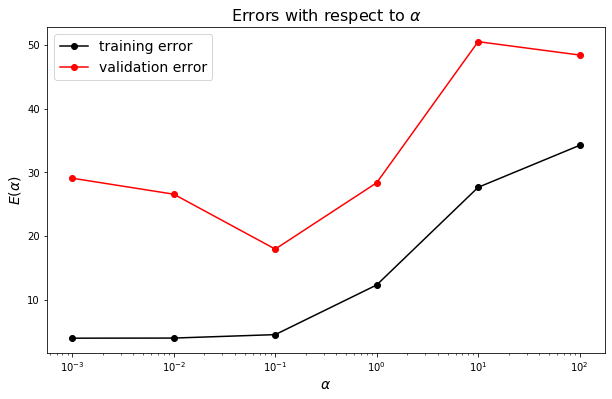

In [211]:
# Plot the training and validation errors
plt.figure(figsize=(10,6))    # Set figure size
plt.plot(alpha_values, err_train, marker='o', color='black', label='training error')    # Plot training errors
plt.plot(alpha_values, err_val, marker='o', color='red', label='validation error')    # Plot validation errors
plt.xscale('log')    # Set x-axis to logarithmic scale
plt.xlabel(r'$\alpha$')    # Set label of x-axis
plt.ylabel(r'$E(\alpha)$')    # Set label of y-axis
plt.title(r'Errors with respect to $\alpha$', fontsize=16)    # Set title
plt.legend()    # Show legend
plt.show()

## Quiz Questions

<a id='QuestionR4_1'></a>
<div class=" alert alert-warning">
<p><b>Student Task.</b> Question R4.1. </p>

<p>What is the goal of model selection in machine learning?</p>

<ol>
  <li> To choose (learn) the optimal predictor function $h_{\rm opt}$ out of a given hypothesis space (model) $\mathcal{H}$.</li>
  <li> To select the most suitable car model using machine learning methods.</li>
  <li> To select the optimal weights used for regularization.</li>
  <li> To select the best hypothesis space out of a set of candidates $\lbrace \mathcal{H}^{(1)}, \mathcal{H}^{(2)}, \ldots,\mathcal{H}^{(n)} \rbrace$.</li>
</ol> 

</div>

In [214]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_R4_Q1  = 1

# YOUR CODE HERE
#raise NotImplementedError()

In [215]:
# This cell is for tests

assert answer_R4_Q1 in [1,2,3,4], '"answer_R4_Q1" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='QuestionR4_2'></a>
<div class=" alert alert-warning">
<p><b>Student Task.</b> Question R4.2. </p>

<p>What is a good measure for the prediction error (loss) incurred by a predictor function $h(\mathbf{x})$ on new data points?</p>
<ol>
  <li> The empirical error (average loss) of $h(\mathbf{x})$ on the <b>training set</b> which is also used to tune $h(\mathbf{x})$. </li>
  <li> The empirical error (average loss) of $h(\mathbf{x})$ on some <b>validation set</b> which is different from the training set. 
</ol> 

</div>

In [217]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_R4_Q2  = 2

# YOUR CODE HERE
#raise NotImplementedError()

In [218]:
# This cell is for tests

assert answer_R4_Q2 in [1,2], '"answer_R4_Q2" Value should be an integer between 1 and 2.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='QuestionR4_3'></a>
<div class=" alert alert-warning">
<p><b>Student Task.</b> Question R4.3. </p>

Regularized linear regression amounts to finding the predictor $h(\mathbf{x})$ which minimizes the regularized training error 
\begin{equation} 
(1/m_{t}) \sum_{\big(\mathbf{x}^{(i)},y^{(i)}\big) \in \mathbb{X}^{(t)}} \big(y^{(i)} - h(\mathbf{x}^{(i)}) \big)^{2} + \alpha \mathcal{R}(h).
\end{equation}
Which statement is true?

<ol>
  <li> Using a large value for the regularization parameter $\alpha$ prefers predictors with large complexity $\mathcal{R}(h)$ but small training error.</li>
  <li>  Using a small value for the regularization parameter $\alpha$ prefers predictors with large complexity $\mathcal{R}(h)$ but small training error.</li>
  <li> For regularization parameter $\alpha=0$, the optimal predictor is always $h(\mathbf{x}) =0$. </li>
  <li> For regularization parameter $\alpha=0$, the optimal predictor is always $h(\mathbf{x}) =42$.</li>
</ol> 

</div>

In [219]:
### STUDENT TASK ###
# remove the line raise NotImplementedError() before testing your solution and submitting code
answer_R4_Q3  = 2

# YOUR CODE HERE
#raise NotImplementedError()

In [220]:
# This cell is for tests

assert answer_R4_Q3 in [1,2,3,4], '"answer_R4_Q3" Value should be an integer between 1 and 3.'
print('Sanity check tests passed!')


Sanity check tests passed!
